# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [575]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# importing the dataframe:

In [576]:
#importing the data
fulldata = pd.read_csv('./hotel_bookings.csv')
fulldata.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [577]:
##getting table information

fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

# dropping irrelevent columns:

In [578]:
#due to the data being collected over a long period of time (3 years), some of the data is irrelevent. dropping irrelevant columns:

fulldata.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month','country', 'reservation_status', 'market_segment','reservation_status_date'], inplace=True)
fulldata


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,TA/TO,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,TA/TO,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,City Hotel,0,102,2,5,3,0.0,0,BB,TA/TO,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,City Hotel,0,34,2,5,2,0.0,0,BB,TA/TO,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,City Hotel,0,109,2,5,2,0.0,0,BB,TA/TO,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


## 1.1 Missing Values (10%)

Identify and handle missing values.

## identifying missing information:

In [579]:
# the difference between the isna and the isnull is:

#isna() is used to detect the missing values 
# in the cells of the pandas data frame. It returns a data frame of the same size with the values masked as True for NA values and False for non-NA values.
#  isnull() is also used to identify or detect the missing values in the data frame. It is just an alias for isna() method.

fulldata.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
dtype: int64

In [580]:
#In the columns agent and company there are lots of rows with the value of 0. I have decided to drop these rows due to the fact that this is irrelevent data which we do not need.
fulldata.drop(columns=['agent', 'company'], inplace= True)
fulldata.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [581]:
fulldata['children'] = fulldata['children'].fillna(0)

## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [582]:
#inconsistant data can be tricy to work with and can affect the accuracy of the model.

fulldata.hotel.value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [583]:
fulldata.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [584]:
fulldata.children.value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [585]:
# you can also quicken up the process by displaying the unique vales of multiple columns at once, this is good as it groups the information and is less time consuming.
# however this makes the data displayed harder to understand and harder to identify the unique values in each column

fulldata[['meal', 'distribution_channel' ]].value_counts()

meal       distribution_channel
BB         TA/TO                   73712
HB         TA/TO                   12625
BB         Direct                  12109
SC         TA/TO                   10132
BB         Corporate                6370
HB         Direct                   1673
Undefined  TA/TO                     849
FB         TA/TO                     552
SC         Direct                    396
Undefined  Direct                    273
FB         Direct                    194
HB         Corporate                 164
BB         GDS                       115
SC         GDS                        78
FB         Corporate                  52
Undefined  Corporate                  47
SC         Corporate                  44
BB         Undefined                   4
HB         Undefined                   1
Name: count, dtype: int64

In [586]:
fulldata.reserved_room_type .value_counts()

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

In [587]:
fulldata.assigned_room_type.value_counts()

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

In [588]:
fulldata.deposit_type.value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [589]:
fulldata.customer_type.value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



# checking for incomplete bookings:

In [590]:
fulldata[(fulldata['adults']==0) & (fulldata['children']==0) & (fulldata['babies']==0)].index

Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,  32029,
        32827,
       ...
       112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251, 116534,
       117087],
      dtype='int64', length=180)

# examine rows with zeros

In [591]:
fulldata[(fulldata['stays_in_weekend_nights']==0) & (fulldata['stays_in_week_nights']==0)].index

Index([     0,      1,    167,    168,    196,    197,    459,    568,    569,
          618,
       ...
       113930, 114678, 114908, 114911, 115482, 115483, 117701, 118029, 118631,
       118963],
      dtype='int64', length=715)

### dropping values with 0

In [592]:
#dropping all the null values to reduce data size and get more accuracy

fulldata = fulldata.drop(fulldata[fulldata['adults']== 0].index)

In [593]:
#testing the code
fulldata[fulldata['adults']== 0].index

Index([], dtype='int64')

### dropping 0 values, stays in nights columns:

In [594]:
fulldata = fulldata.drop(fulldata[(fulldata['stays_in_weekend_nights']== 0) & (fulldata['stays_in_week_nights']== 0)].index)

In [595]:
#testing the code

fulldata[(fulldata['stays_in_weekend_nights']== 0) & (fulldata['stays_in_week_nights']== 0)].index

Index([], dtype='int64')

# Outliers:

## Boxplots of Columns:

<Axes: >

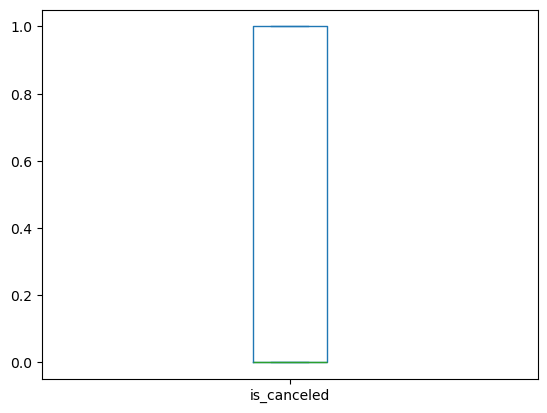

In [596]:
# e.g Boxpot of the column is_canceled:

fulldata.plot(y=['is_canceled'], kind='box')

## Boxplotting and removing Outlier:

### lead_time:

<Axes: >

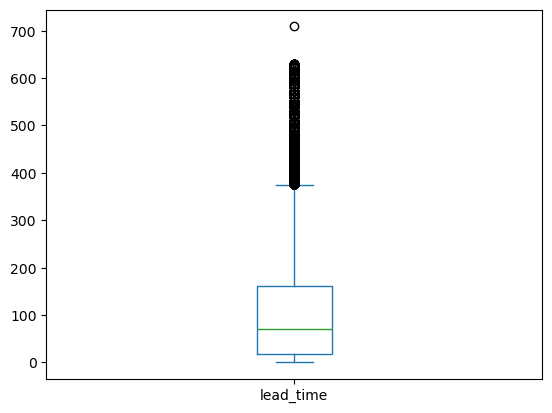

In [597]:
fulldata.plot(y=['lead_time'], kind='box')

<Axes: >

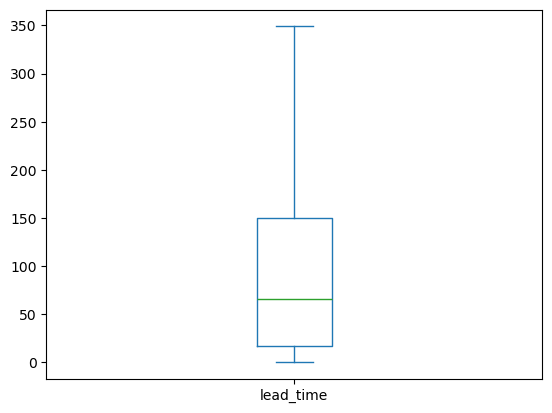

In [598]:
fulldata = fulldata.drop(fulldata[fulldata['lead_time']> 349].index)
fulldata.plot(y=['lead_time'], kind='box')

### stays_in_weekend_nights:

<Axes: >

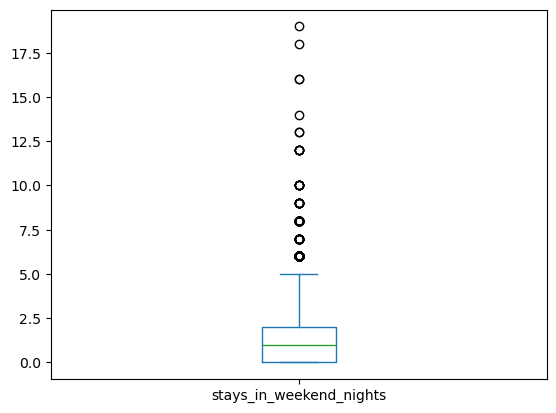

In [599]:
fulldata.plot(y=['stays_in_weekend_nights'], kind='box')

<Axes: >

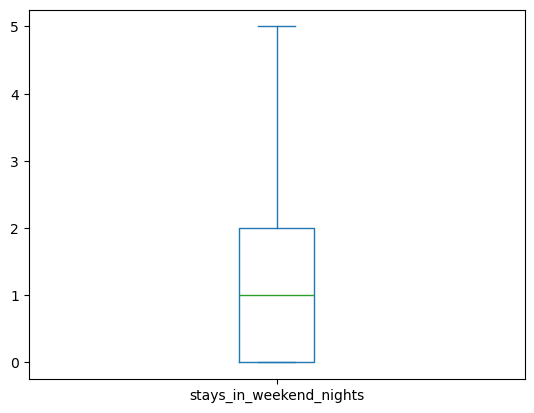

In [600]:
fulldata = fulldata.drop(fulldata[fulldata['stays_in_weekend_nights']> 5].index)
fulldata.plot(y=['stays_in_weekend_nights'], kind='box')

### stays_in_week_nights:

<Axes: >

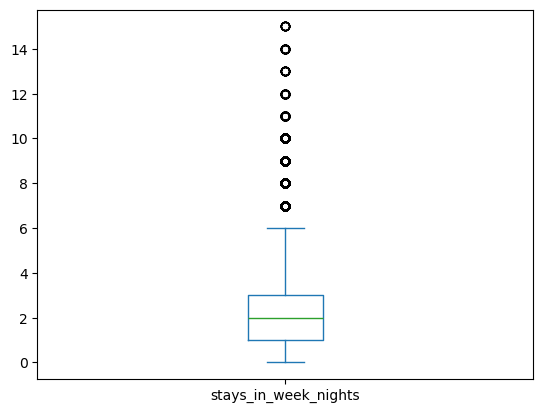

In [601]:
fulldata.plot(y=['stays_in_week_nights'], kind='box')

<Axes: >

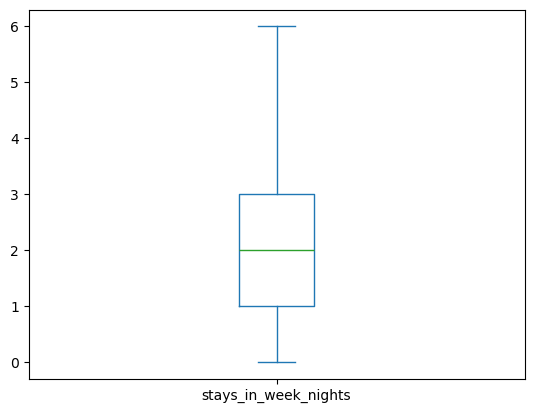

In [602]:
fulldata = fulldata.drop(fulldata[fulldata['stays_in_week_nights']> 6].index)
fulldata.plot(y=['stays_in_week_nights'], kind='box')

### ADR:

<Axes: >

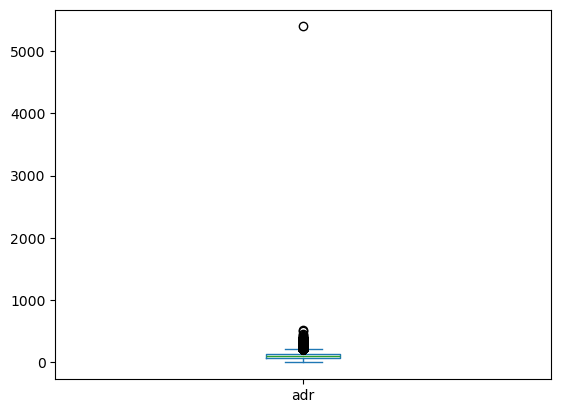

In [603]:
fulldata.plot(y=['adr'], kind='box')

<Axes: >

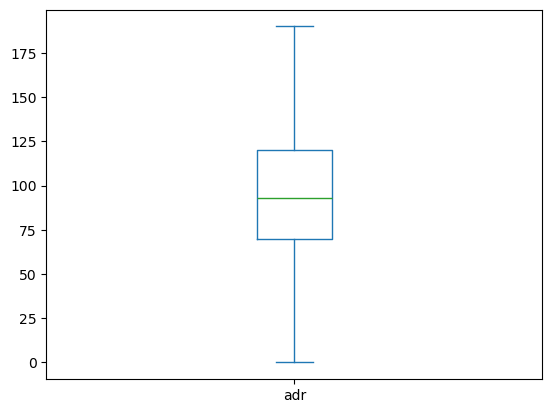

In [604]:
fulldata = fulldata.drop(fulldata[(fulldata['adr']>190) | (fulldata['adr'] < 0)].index)
fulldata.plot(y=['adr'], kind='box')

## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


In [605]:
fulldata['children'] = fulldata['children'].astype('int64')

# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

In [606]:
hotel_location = fulldata.hotel.unique()

In [607]:
#splitting data into 2 different datasets

city_hotel_data = fulldata.drop(fulldata[fulldata['hotel']== hotel_location[0]].index)
resort_hotel_data = fulldata.drop(fulldata[fulldata['hotel']== hotel_location[1]].index)

In [608]:
# Turning is_canceled column into a verible
city_hotel_data = city_hotel_data.is_canceled.value_counts()
resort_hotel_data = resort_hotel_data.is_canceled.value_counts()

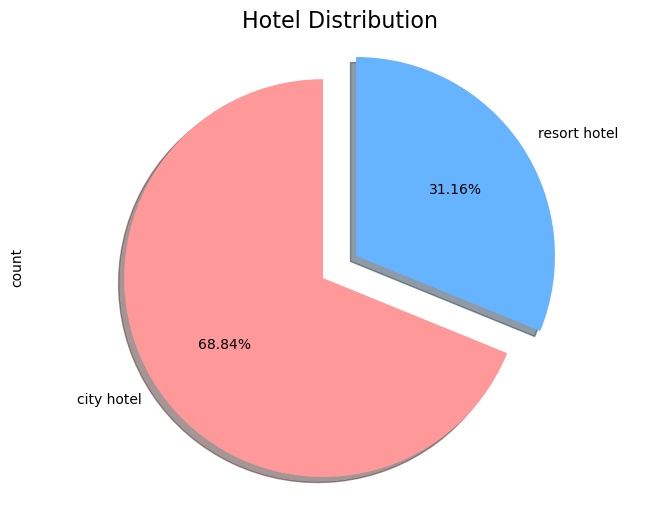

In [609]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create the pie chart
labels = fulldata['hotel'].value_counts().index 
fulldata['hotel'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    startangle=90, 
    colors=colors,
    shadow=True, 
    explode=[0.1] * len(labels),
    labels={'city hotel','resort hotel'},
)
plt.title('Hotel Distribution', fontsize=16)
plt.axis('equal')
plt.show()



## 2.2. Identifying the most frequently ordered meal types.

<Axes: title={'center': 'Meal Frequency'}, xlabel='meal'>

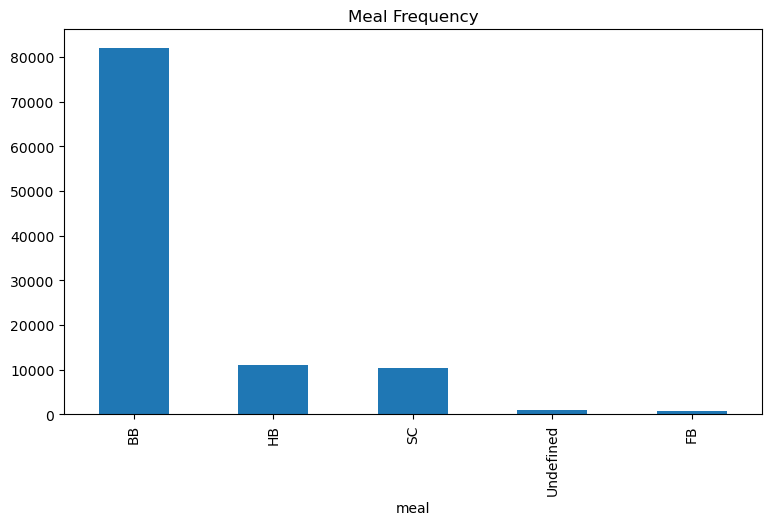

In [610]:
# Meal value count as a bar chart
fulldata.meal.value_counts().plot(kind='bar',title='Meal Frequency',figsize=[9,5])

## 2.3. Determining the number of returning guests.

<Axes: title={'center': 'Guest Return'}, ylabel='count'>

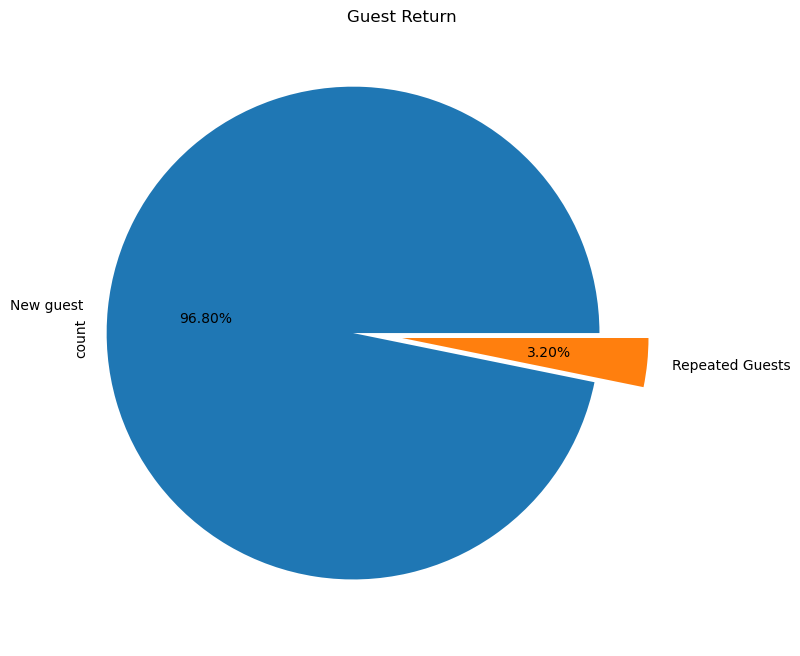

In [611]:
explode = (0.2,0)
fulldata.is_repeated_guest.value_counts().plot(kind='pie',labels={'New guest','Repeated Guests'}, figsize=[12,8],title='Guest Return', explode= explode, autopct='%.2f%%')

In [612]:
guests_repeated = fulldata.is_repeated_guest.value_counts()
guests_repeated


is_repeated_guest
0    101757
1      3361
Name: count, dtype: int64

##### The total number of guests that came back is 3361.

## 2.4. Discovering the most booked room types.

In [613]:
# Count the occurrences of each unique value in the 'reserved_room_type' column
room_types = fulldata.reserved_room_type.value_counts()
room_types

reserved_room_type
A    78972
D    16732
E     4881
F     1701
G     1092
B      869
C      558
H      308
L        5
Name: count, dtype: int64

<Axes: xlabel='reserved_room_type'>

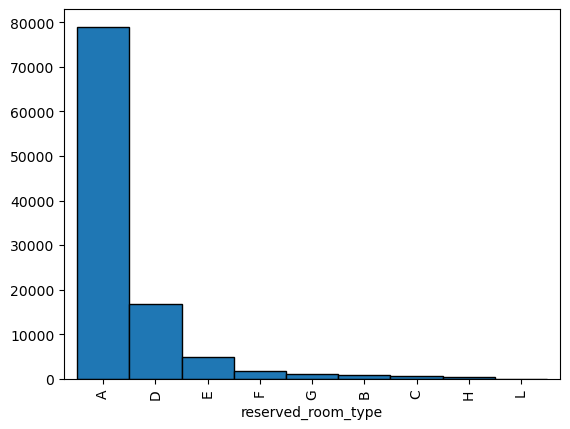

In [614]:
room_types.plot(kind='bar', edgecolor = 'black', width = 1)

##### As it can be seen in the above graph room_type A is the most popular

## 2.5. Exploring correlations between room types and cancellations.

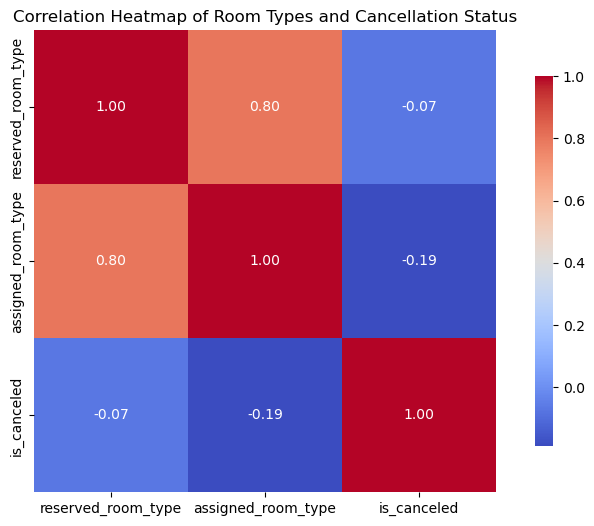

In [615]:

# Convert 'reserved_room_type' and 'assigned_room_type' to categorical and get their codes
fulldata['reserved_room_type'] = fulldata['reserved_room_type'].astype('category').cat.codes
fulldata['assigned_room_type'] = fulldata['assigned_room_type'].astype('category').cat.codes

# Create a DataFrame containing reserved and assigned room types along with cancellation status
canceled_rooms = fulldata[['reserved_room_type', 'assigned_room_type', 'is_canceled']]

# Calculate the correlation matrix of the selected features
correlation = canceled_rooms.corr().round(2)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap to visualise the correlation 
sb.heatmap(correlation, cmap="coolwarm", annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Set title for better understanding
plt.title('Correlation Heatmap of Room Types and Cancellation Status')
plt.show()


#### conclusion:

### 
The correlation heatmap of the canceled_rooms DataFrame reveals important relationships among the variables reserved_room_type, assigned_room_type, and is_canceled.

Room Types Correlation:
If the correlation between reserved_room_type and assigned_room_type is high (close to 1), it indicates that guests typically receive the room they reserved, suggesting efficient management of room assignments.

Cancellation Insights:
A strong negative correlation between either room type and is_canceled suggests that certain room types are less likely to be canceled. This could indicate popularity or customer satisfaction with those specific types.
Conversely, if a room type has a high positive correlation with is_canceled, it may point to issues that make that room type less desirable.

# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

## 3.1. Binning

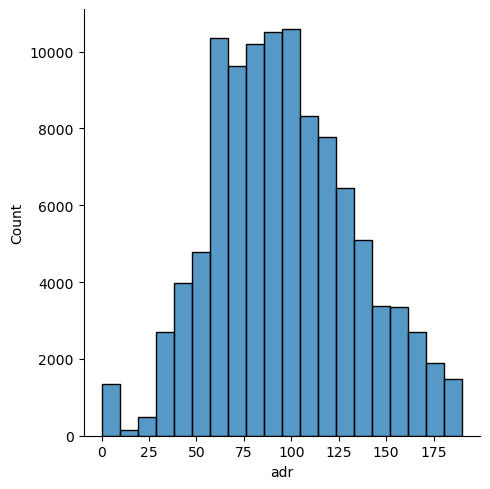

In [616]:
#Create a distribution plot for the 'adr' (average daily rate) variable
sb.displot(data = fulldata, x = 'adr', bins = 20)

##### Binning reduces the noise in the data and makes it easier to visualise and analyse trends. It allows you to summarise large datasets by organizing data into intervals. 
##### As it can be seen in the above graph using bins narrows the data making it easier to assess.

## 3.2. Encoding

#### Hotel column:

In [617]:
#access the interget values in the category data
fulldata['hotel'] = fulldata['hotel'].astype('category').cat.codes

In [618]:
fulldata.reset_index(drop=True,inplace=True)

#### Meal column:

In [619]:
ohe = OneHotEncoder(sparse_output= False)

#applying One Hot coding to the meal column:
ohe_coded = ohe.fit_transform(fulldata[['meal']])

#converting the resutl into Dataframe:
one_hot = pd.DataFrame(ohe_coded, columns= ohe.get_feature_names_out(['meal']))

#drop original column
fulldata = fulldata.drop('meal', axis = 1)

#join the new One Hot code to the original
fulldata = fulldata.join(one_hot)

fulldata

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,1,0,7,0,1,1,0,0,Direct,0,...,0,Transient,75.00,0,0,1.0,0.0,0.0,0.0,0.0
1,1,0,13,0,1,1,0,0,Corporate,0,...,0,Transient,75.00,0,0,1.0,0.0,0.0,0.0,0.0
2,1,0,14,0,2,2,0,0,TA/TO,0,...,0,Transient,98.00,0,1,1.0,0.0,0.0,0.0,0.0
3,1,0,14,0,2,2,0,0,TA/TO,0,...,0,Transient,98.00,0,1,1.0,0.0,0.0,0.0,0.0
4,1,0,0,0,2,2,0,0,Direct,0,...,0,Transient,107.00,0,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105113,0,0,164,2,4,2,0,0,TA/TO,0,...,0,Transient,87.60,0,0,1.0,0.0,0.0,0.0,0.0
105114,0,0,21,2,5,2,0,0,TA/TO,0,...,0,Transient,96.14,0,2,1.0,0.0,0.0,0.0,0.0
105115,0,0,23,2,5,2,0,0,TA/TO,0,...,0,Transient,96.14,0,0,1.0,0.0,0.0,0.0,0.0
105116,0,0,34,2,5,2,0,0,TA/TO,0,...,0,Transient,157.71,0,4,1.0,0.0,0.0,0.0,0.0


#### Distribution_channel:

In [620]:

#applying One Hot coding to the distribution_channel column:
ohe_coded = ohe.fit_transform(fulldata[['distribution_channel']])

#converting the resutl into Dataframe:
one_hot = pd.DataFrame(ohe_coded, columns= ohe.get_feature_names_out(['distribution_channel']))

#drop original column
fulldata = fulldata.drop('distribution_channel', axis = 1)

#join the new One Hot code to the original
fulldata = fulldata.join(one_hot)

fulldata

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,1,0,7,0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,13,0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,14,0,2,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,14,0,2,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105113,0,0,164,2,4,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
105114,0,0,21,2,5,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
105115,0,0,23,2,5,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
105116,0,0,34,2,5,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Deposit_type:

In [621]:
#using the replace(() function to manually convert the data:
deposit_type = fulldata.deposit_type.unique()

fulldata['deposit_type'] = fulldata['deposit_type'].replace({deposit_type[0]:0, deposit_type[1]: 1, deposit_type[2]:2})

fulldata.deposit_type.value_counts()


C:\Users\alias\AppData\Local\Temp\ipykernel_27960\2402214467.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['deposit_type'] = fulldata['deposit_type'].replace({deposit_type[0]:0, deposit_type[1]: 1, deposit_type[2]:2})


deposit_type
0    92781
2    12186
1      151
Name: count, dtype: int64

In [622]:
# Checking to see all the columns are no longer have object datatype:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105118 entries, 0 to 105117
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           105118 non-null  int8   
 1   is_canceled                     105118 non-null  int64  
 2   lead_time                       105118 non-null  int64  
 3   stays_in_weekend_nights         105118 non-null  int64  
 4   stays_in_week_nights            105118 non-null  int64  
 5   adults                          105118 non-null  int64  
 6   children                        105118 non-null  int64  
 7   babies                          105118 non-null  int64  
 8   is_repeated_guest               105118 non-null  int64  
 9   previous_cancellations          105118 non-null  int64  
 10  previous_bookings_not_canceled  105118 non-null  int64  
 11  reserved_room_type              105118 non-null  int8   
 12  assigned_room_ty

In [623]:
#applying One Hot coding to the customer_type column:
ohe_coded = ohe.fit_transform(fulldata[['customer_type']])

#converting the resutl into Dataframe:
one_hot = pd.DataFrame(ohe_coded, columns= ohe.get_feature_names_out(['customer_type']))

#drop original column
fulldata = fulldata.drop('customer_type', axis = 1)

#join the new One Hot code to the original
fulldata = fulldata.join(one_hot)

fulldata

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,meal_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,7,0,1,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,13,0,1,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,14,0,2,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0,14,0,2,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,2,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105113,0,0,164,2,4,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
105114,0,0,21,2,5,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
105115,0,0,23,2,5,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
105116,0,0,34,2,5,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [624]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105118 entries, 0 to 105117
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           105118 non-null  int8   
 1   is_canceled                     105118 non-null  int64  
 2   lead_time                       105118 non-null  int64  
 3   stays_in_weekend_nights         105118 non-null  int64  
 4   stays_in_week_nights            105118 non-null  int64  
 5   adults                          105118 non-null  int64  
 6   children                        105118 non-null  int64  
 7   babies                          105118 non-null  int64  
 8   is_repeated_guest               105118 non-null  int64  
 9   previous_cancellations          105118 non-null  int64  
 10  previous_bookings_not_canceled  105118 non-null  int64  
 11  reserved_room_type              105118 non-null  int8   
 12  assigned_room_ty

#### *Conclusion:*

##### converted the data into categorical  using encoding to get a better understanding of the the values and allows me to make amendments to the indivisual values.

## 3.3. Scaling

In [625]:
# Initialising the StandardScaler
std_scaler = StandardScaler()

# Fit the scaler to the data and transform it, creating a new DataFrame with standardised values
fulldata_std = pd.DataFrame(std_scaler.fit_transform(fulldata.values), columns=fulldata.columns, index=fulldata.index)

print("Dataset using Standard Scaling")

fulldata_std


Dataset using Standard Scaling


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,meal_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1.486312,-0.751681,-0.955664,-0.987359,-0.919393,-1.488238,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,2.707179,-0.041185,-2.123994,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
1,1.486312,-0.751681,-0.889210,-0.987359,-0.919393,-1.488238,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,3.970882,-0.369388,-0.041185,-2.123994,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
2,1.486312,-0.751681,-0.878134,-0.987359,-0.210978,0.279532,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,-0.369388,-0.041185,0.470811,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
3,1.486312,-0.751681,-0.878134,-0.987359,-0.210978,0.279532,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,-0.369388,-0.041185,0.470811,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
4,1.486312,-0.751681,-1.033194,-0.987359,-0.210978,0.279532,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,2.707179,-0.041185,-2.123994,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105113,-0.672806,-0.751681,0.783221,1.316253,1.205851,0.279532,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,-0.369388,-0.041185,0.470811,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
105114,-0.672806,-0.751681,-0.800604,1.316253,1.914265,0.279532,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,-0.369388,-0.041185,0.470811,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
105115,-0.672806,-0.751681,-0.778453,1.316253,1.914265,0.279532,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,-0.369388,-0.041185,0.470811,-0.006897,-0.178362,-0.070372,0.58017,-0.525001
105116,-0.672806,-0.751681,-0.656620,1.316253,1.914265,0.279532,-0.224947,-0.077822,-0.181741,-0.103568,...,-0.099183,-0.251833,-0.369388,-0.041185,0.470811,-0.006897,-0.178362,-0.070372,0.58017,-0.525001


##### In this code, `StandardScaler` standardises the features of `fulldata` by removing the mean and scaling to unit variance. The transformed data is stored in `fulldata_std`, which maintains the original column names and indices for clarity. This process helps to improve the performance of machine learning algorithms by ensuring that all features contribute equally.

## 3.4. Feature selection

In [626]:
x = fulldata_std.drop(columns=['is_canceled'])
y = fulldata.is_canceled

##### The code separates the feature matrix `X` by dropping the target variable `is_canceled` from the standardized dataset `fulldata_std`. It assigns the target variable `y` to the `is_canceled` column in the original dataset `fulldata`.

# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [627]:
# Splitting the datasets into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

##### This code splits the feature matrix `x` and target variable `y` into training and testing sets, with 70% of the data used for training (`X_train`, `Y_train`) and 30% for testing (`X_test`, `Y_test`). This helps evaluate model performance on unseen data.

## 4.2. Model Training (10%)

In [628]:
# Initialize a Decision Tree Classifier with 'entropy' as the criterion and a fixed random state
data_training = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit the model on the training data and make predictions on the test data
data_training = data_training.fit(X_train, Y_train)
Y_prediction = data_training.predict(X_test)


##### A Decision Tree Classifier is created and trained using the training data (X_train, Y_train), and then it predicts the target variable for the test set (X_test).

## 4.3. Model Evaluation (5%)

In [629]:
# Calculate the accuracy of the model by comparing predicted values to actual values
data_accuracy = metrics.accuracy_score(Y_test, Y_prediction)

# Print the accuracy score of the model
print("STD Accuracy:", data_accuracy)


STD Accuracy: 0.8160197869101978


### Overall accurancy of the data is: *81.49%*

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [631]:
# Print a header for the importance of features
print("Importance Classifier")

# Create a DataFrame that combines feature names with their importance scores, sort by importance, and display the top 20
pd.concat(
    (pd.DataFrame(fulldata_std.iloc[:, 1:].columns, columns=['variable']),
     pd.DataFrame(data_training.feature_importances_, columns=['importance'])),
    axis=1).sort_values(by='importance', ascending=False)[:20]


Importance Classifier


,variable,importance
1,lead_time,0.236450
13,deposit_type,0.199129
15,adr,0.196575
3,stays_in_week_nights,0.063691
2,stays_in_weekend_nights,0.036500
17,total_of_special_requests,0.029650
8,previous_cancellations,0.028319
11,assigned_room_type,0.025729
16,required_car_parking_spaces,0.025477
4,adults,0.019169


##### The code combines the feature names and their corresponding importance scores from the trained Decision Tree model into a single DataFrame. It then sorts this DataFrame by importance and displays the top 20 most important features, highlighting their relevance in the classification task.